In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [6]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

<AxesSubplot:xlabel='Taxable.Income'>

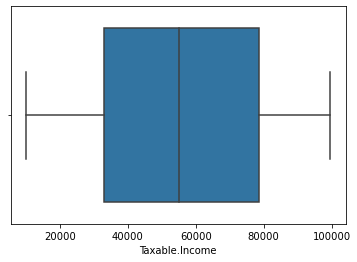

In [7]:
import seaborn as sns
sns.boxplot(df['Taxable.Income'])

In [8]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Marital.Status']= LE.fit_transform(df['Marital.Status'])
df['Undergrad']= LE.fit_transform(df['Undergrad'])
df['Urban']= LE.fit_transform(df['Urban'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
data=df[['Taxable.Income','City.Population','Work.Experience','Undergrad','Marital.Status','Urban']]
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,68833,50047,10,0,2,1
1,33700,134075,18,1,0,1
2,36925,160205,30,0,1,1
3,50190,193264,15,1,2,1
4,81002,27533,28,0,1,0


In [10]:
#taxable income is <=30000 means Risky(0) otherwise Good(1)
data['Taxable.Income']=[0 if i<=30000 else 1 for i in data['Taxable.Income']]
data

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,1,50047,10,0,2,1
1,1,134075,18,1,0,1
2,1,160205,30,0,1,1
3,1,193264,15,1,2,1
4,1,27533,28,0,1,0
...,...,...,...,...,...,...
595,1,39492,7,1,0,1
596,1,55369,2,1,0,1
597,1,154058,0,0,0,1
598,1,180083,17,1,1,0


In [11]:
#remove outliers
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data)

IsolationForest(contamination=0.01, random_state=10)

In [12]:
#predictions
y_pred_outliers = clf.predict(data)
y_pred_outliers                                      #-1 for outliers and 1 for inliers.

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [13]:
data['Outliers']=y_pred_outliers
data

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
0,1,50047,10,0,2,1,1
1,1,134075,18,1,0,1,1
2,1,160205,30,0,1,1,1
3,1,193264,15,1,2,1,1
4,1,27533,28,0,1,0,1
...,...,...,...,...,...,...,...
595,1,39492,7,1,0,1,1
596,1,55369,2,1,0,1,1
597,1,154058,0,0,0,1,1
598,1,180083,17,1,1,0,1


In [14]:
data[data.Outliers==-1]

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
16,0,34551,29,1,0,0,-1
34,0,183767,1,1,0,1,-1
126,0,195022,3,1,0,1,-1
168,0,167629,30,0,0,0,-1
280,0,33184,1,0,0,0,-1
541,0,191874,30,1,0,1,-1


In [15]:
data1= data.drop(data.index[[16,34,126,168,280,541]],axis=0).reset_index()
data1

,index,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,Outliers
0,0,1,50047,10,0,2,1,1
1,1,1,134075,18,1,0,1,1
2,2,1,160205,30,0,1,1,1
3,3,1,193264,15,1,2,1,1
4,4,1,27533,28,0,1,0,1
...,...,...,...,...,...,...,...,...
589,595,1,39492,7,1,0,1,1
590,596,1,55369,2,1,0,1,1
591,597,1,154058,0,0,0,1,1
592,598,1,180083,17,1,1,0,1


In [16]:
#remove extra columns
data1=data1.drop(['Outliers','index'],axis=1)

In [17]:
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,1,50047,10,0,2,1
1,1,134075,18,1,0,1
2,1,160205,30,0,1,1
3,1,193264,15,1,2,1
4,1,27533,28,0,1,0
...,...,...,...,...,...,...
589,1,39492,7,1,0,1
590,1,55369,2,1,0,1
591,1,154058,0,0,0,1
592,1,180083,17,1,1,0


In [18]:
#dividing data
x=data1.iloc[:,1:]
y=data1.iloc[:,0]


In [19]:
#standerization
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
MM_x=MM.fit_transform(x)

In [20]:
#split data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(MM_x,y,test_size=0.3,random_state=40)

In [21]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((415, 5), (179, 5), (415,), (179,))

In [22]:
#by using entropy
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [23]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [24]:

Y_pred_test= DT.predict(x_test)   

In [25]:
DT.score(x_test, y_test)

0.7094972067039106

In [26]:
np.mean(Y_pred_test==y_test)

0.7094972067039106

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
cm=confusion_matrix(y_test,Y_pred_test)
cm

array([[  9,  34],
       [ 18, 118]], dtype=int64)

In [28]:
ac=accuracy_score(y_test,Y_pred_test)
print("accuracy score:",ac.round(2))

accuracy score: 0.71


In [29]:
DT.tree_.max_depth

10

In [30]:
DT.tree_.node_count

97

In [31]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.33      0.21      0.26        43
           1       0.78      0.87      0.82       136

    accuracy                           0.71       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.67      0.71      0.68       179



In [32]:
#by using gini
DT1= DecisionTreeClassifier(criterion='gini',max_depth=9)

In [33]:
DT1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [34]:
DT1.tree_.max_depth

9

In [35]:

Y_pred_test1= DT1.predict(x_test)   
Y_pred_train1= DT1.predict(x_train)   

In [36]:
DT1.score(x_test, y_test)

0.6927374301675978

In [37]:
cm=confusion_matrix(y_test,Y_pred_test1)
cm

array([[  9,  34],
       [ 21, 115]], dtype=int64)

In [38]:
ac=accuracy_score(y_test,Y_pred_test1)
print("accuracy score:",ac.round(2))

accuracy score: 0.69


#grid search cv

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(3, 150)}]
model1 = DecisionTreeClassifier()
estimator = model1

clf = GridSearchCV(estimator,tree_param, cv=10)
clf.fit(x,y)

print(clf.best_score_)
print(clf.best_params_)

0.7996327683615819
{'criterion': 'gini', 'max_depth': 3}


In [40]:
tree_param1 = [{'min_samples_split':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150],'min_samples_leaf':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150]}]
clf2= GridSearchCV(estimator,tree_param1, cv=10)
clf2.fit(x,y)
print(clf2.best_score_)
print(clf2.best_params_)

0.8014124293785312
{'min_samples_leaf': 11, 'min_samples_split': 120}


In [41]:
clf.best_params_,clf2.best_params_

({'criterion': 'gini', 'max_depth': 3},
 {'min_samples_leaf': 11, 'min_samples_split': 120})

In [42]:
#fitting model on this data
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3,min_samples_leaf=11,min_samples_split=150)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=11, min_samples_split=150)

In [43]:
pred_cv = model.predict(x_test) 

In [44]:
acc = accuracy_score(y_test, pred_cv) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_cv)

Accuracy = 75.97765363128491


array([[  0,  43],
       [  0, 136]], dtype=int64)

In [45]:
#model validation
# 1.Evaluate using a train and a test set

model1 =DecisionTreeClassifier(criterion = 'gini',max_depth=3, min_samples_split=150,min_samples_leaf=11)
model1.fit(x_train,y_train)
result = model1.score(x_test,y_test)
result*100           

75.97765363128491

In [46]:
# 2.Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds =10

kfold = KFold(n_splits=num_folds, random_state=None)
model2=DecisionTreeClassifier(criterion = 'gini',max_depth=3, min_samples_split=150,min_samples_leaf=11)
results = cross_val_score(model2,x,y, cv=kfold)

print(results.mean()*100.0)
print(results.std()*100)

80.15819209039549
6.594060239204076


In [47]:
# Evaluate using Leave One Out Cross Validation

from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model3 = DecisionTreeClassifier(criterion = 'gini',max_depth=3, min_samples_split=150,min_samples_leaf=11)
results = cross_val_score(model3,x,y,cv=loocv)

print(results.mean()*100.0)
print(results.std()*100)

80.13468013468014
39.898634728277536


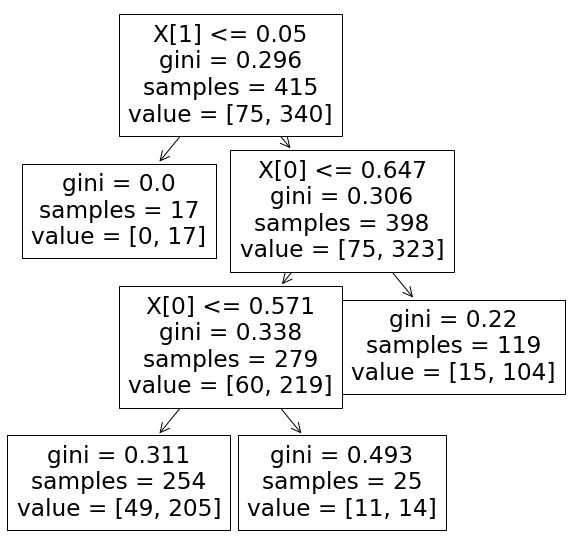

In [48]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
model_L = DecisionTreeClassifier(criterion = 'gini',max_depth=3,min_samples_leaf=11,min_samples_split=150)
tree.plot_tree(model_L.fit(x_train,y_train));